In [1]:
from settings import *
%matplotlib inline
config_dict = process_config()
info_file = config_dict['data']['exp_design']
info = pd.read_csv(info_file, index_col=0)
count_file = config_dict['counts']['tpms_4']
figures_dir = config_dict['out_dir']['figures']
results_dir = config_dict['out_dir']['tables']

info = info[info.experiment == "E2"]
info['position'] = info['position'].map({'B': "{}|{}".format(wt, bh_wt),
                                        "BH": "{}|{}".format(wt, bh_mut),
                                        "B9":"{}|{}".format(mut, bh_mut),
                                        "L-HI":wt_L,
                                        "L-9C": mut_L})

count_file = config_dict['counts']['tpms_30']

/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/lib/config


In [2]:
cnts = pd.read_csv(count_file, index_col=0)
tpms_norm = cnts.apply(vis.invnorm)
line_info = info[info["case"].isin(["Case6", "Case5","Case9", "Case10"])]
line_tpms = tpms_norm[line_info.index]
pDf, pc1_var, pc2_var = vis.findTwoComponents(line_tpms, line_info)
pDf

,PC1,PC2,experiment,case,time_point,strain,position,RIN
S76067,-7.108743,-0.204657,E2,Case5,30 min,HI,Merge,6.8
S76068,-11.036998,-0.319439,E2,Case5,30 min,HI,Merge,6.1
S76069,-7.119366,-0.851135,E2,Case5,30 min,HI,Merge,6.1
S76070,1.175679,0.787013,E2,Case6,0 min,HI,Merge,6.4
S76071,1.841531,-4.703169,E2,Case6,0 min,HI,Merge,4.5
S76072,-3.312780,-3.116014,E2,Case6,0 min,HI,Merge,6.1
S76079,8.481273,8.792649,E2,Case9,0 min,Mix,Dienes Line,7.4
S76080,2.148391,5.775919,E2,Case9,0 min,Mix,Dienes Line,7.3
S76081,-0.940812,3.880513,E2,Case9,0 min,Mix,Dienes Line,6.8
S76082,-0.288577,-0.244176,E2,Case10,30 min,Mix,Dienes Line,6.2


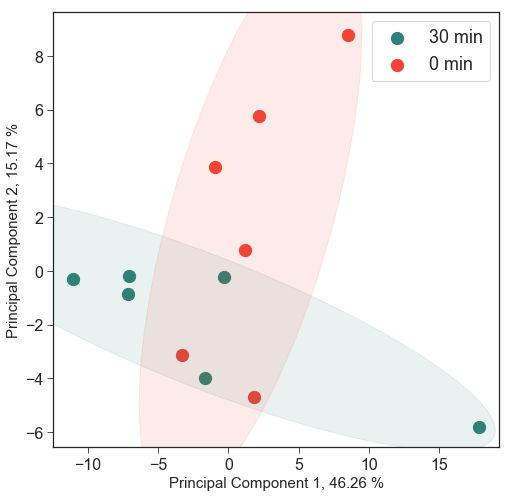

In [4]:
fn = os.path.join(figures_dir, 'Figure_3a.png')
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "time_point", c= [col4, col1], nameby="", title = "", 
              filename = fn, el=True)

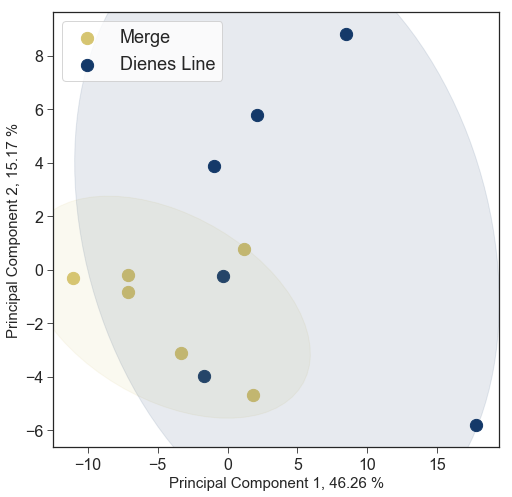

In [5]:
fn = os.path.join(figures_dir, 'Figure_3b.png')
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "position", c= [col2, col5], nameby="", title = "", 
              filename = fn, el=True)

In [3]:
de_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
          "tables/2018-06-28-dienes-line-0-30_edited.csv"
de_file_sw = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
             "tables/2018-06-28-wt-swarm-front-0-30_edited.csv"
log2change_sw = pd.read_csv(de_file_sw, index_col=0)
log2change_dl = pd.read_csv(de_file, index_col=0)

L2FC_new = pd.DataFrame({ wt_L:log2change_sw["Log2 Fold Change"], mut_L:log2change_dl["Log2 Fold Change"],
                          "gene_name":log2change_dl["Gene Name"]}).dropna()
L2FC_new
name_it = [ "$\it{}$".format(g) for g in L2FC_new.gene_name]
full_name =["{} ({})".format(i, n) for i, n in zip(L2FC_new.index, name_it)]
L2FC_new["full_name"] = full_name
L2FC_new_it = L2FC_new[[mut_L, wt_L]]
L2FC_new_it.set_index(L2FC_new.full_name, inplace=True)
L2FC_new_it.index.name=""
L2FC_new_it

,Dienes Line,Merge
,,
PMI1425 ($\ithmuR1$),2.219405,-1.966218
PMI1426 ($\ithmuR2$),2.536457,-1.631109
PMI1427 ($\ithmuS$),1.598964,-1.050086
PMI1428 ($\ithmuT$),1.559769,-1.156050
PMI1429 ($\ithmuU$),1.358556,-1.262715
PMI1430 ($\ithmuV$),1.166837,-1.262843


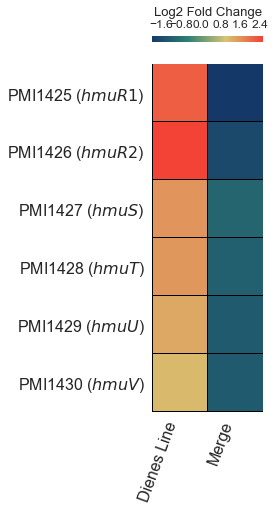

In [4]:
my_cmap = my_cmap = LinearSegmentedColormap.from_list('custom blue', [col5, col4, col2,col1], N=256)
fig = plt.figure(figsize=(2,8))
sns.set(font_scale=1.2)
ax = sns.heatmap(L2FC_new_it, cmap = my_cmap, 
                 linewidths=0.5, linecolor='black',
                 cbar_kws = {'use_gridspec':False,'location':"top",
                            'label': 'Log2 Fold Change', });
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 16, rotation = 70, ha= "right");
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, rotation = 360);

fig.savefig(os.path.join(figures_dir, "Figure_3c.png"), dpi=300, bbox_inches="tight")

In [7]:
mk_file = config_dict["data"]["mutant_killing"]
mk = pd.read_csv(mk_file, index_col=0, names=["Kan RPKM"])
mk = mk.join(line_info, how = "inner")
mk["samples"] = [samples[i] for i in mk["case"]]
mk

,Kan RPKM,experiment,case,time_point,strain,position,RIN,samples
S76067,0.53,E2,Case5,30 min,HI,Merge,6.8,Merge | 30 min
S76068,0.74,E2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
S76069,1.57,E2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
S76070,1.47,E2,Case6,0 min,HI,Merge,6.4,Merge | 0 min
S76071,4.25,E2,Case6,0 min,HI,Merge,4.5,Merge | 0 min
S76072,1.62,E2,Case6,0 min,HI,Merge,6.1,Merge | 0 min
S76079,111.53,E2,Case9,0 min,Mix,Dienes Line,7.4,Dienes Line | 0 min
S76080,129.75,E2,Case9,0 min,Mix,Dienes Line,7.3,Dienes Line | 0 min
S76081,78.52,E2,Case9,0 min,Mix,Dienes Line,6.8,Dienes Line | 0 min
S76082,258.08,E2,Case10,30 min,Mix,Dienes Line,6.2,Dienes Line | 30 min


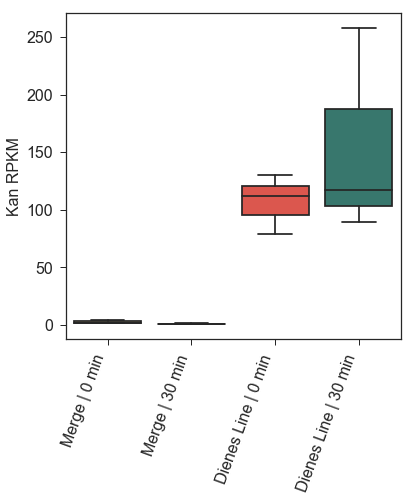

In [8]:
fig = plt.figure(figsize = (6,6))
sns.set_style("ticks")
order = [samples["Case6"], samples["Case5"], samples["Case9"], samples["Case10"]]
ax = sns.boxplot(x= "samples", y="Kan RPKM", data = mk, palette=[col2, col5, col1, col4], order=order);
plt.yticks(fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 16,ha="right")
ax.set_xlabel("")
ax.set_ylabel(ax.get_ylabel(), fontsize=16)
fig.savefig(os.path.join(figures_dir, "Figure_3d.png"), dpi=300, bbox_inches="tight")

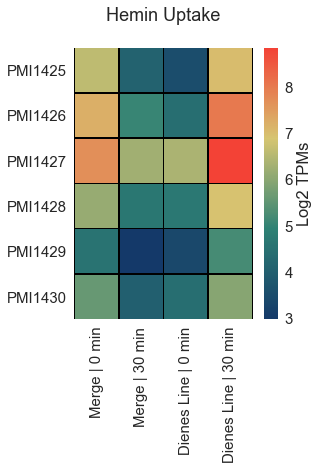

In [6]:
hemin = ["PMI1425", "PMI1426", "PMI1427", "PMI1428", "PMI1429", "PMI1430"]
sns.set(font_scale=1.5)

fig = vis.draw_heatmap_of_subset(hemin, info, "Hemin Uptake\n",
                          cnts, samples, my_cmap, (4,5), ["Case6", "Case5", "Case9", "Case10"])
fig.savefig(os.path.join(figures_dir, "Supplemental_figure_1a.png"), dpi=300, bbox_inches="tight")

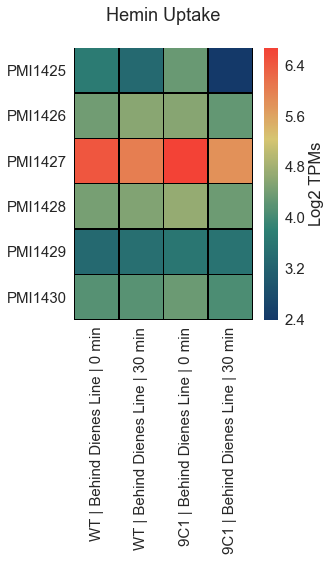

In [7]:
fig = vis.draw_heatmap_of_subset(hemin, info, "Hemin Uptake\n",
                          cnts, samples, my_cmap, (4,5))
fig.savefig(os.path.join(figures_dir, "Supplemental_figure_1b.png"), dpi=300, bbox_inches="tight")

In [6]:

de_DL = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/tables/"\
        "2018-06-28-dienes-line-0-30_edited.csv"
de_ME = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/tables/"\
        "2018-06-28-wt-swarm-front-0-30_edited.csv"
    
data_folder = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/tables/"
de_mut= pd.read_csv(de_DL, index_col=0)
de_wt= pd.read_csv(de_ME, index_col=0)
de_mut = get_rid_of_genbank(de_mut)
de_wt = get_rid_of_genbank(de_wt)


de_mut = de_mut.drop(["Mean Expression"], axis=1).sort_index()
de_mut.to_excel(os.path.join(data_folder, "Supplementary_Table_4_DIENES_LINE_30_MIN.xlsx"))

de_wt = de_wt.drop(["Mean Expression"], axis=1).sort_index()
de_wt.to_excel(os.path.join(data_folder, "Supplementary_Table_3_MERGE_30_min.xlsx"))

In [4]:
de_wt.shape

(121, 5)

In [5]:
de_mut.shape

(24, 5)